In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
from ultron.factor.genetic.geneticist.operators import *

In [2]:
from kdutils.common import fetch_temp_data, fetch_temp_returns

In [3]:
method = 'bicso0'
instruments = 'ims'
period = 15

In [4]:
total_factors = fetch_temp_data(method=method,
                                    instruments=instruments,
                                    datasets=['train', 'val', 'test'])

total_returns = fetch_temp_returns(method=method,
                                       instruments=instruments,
                                       datasets=['train', 'val', 'test'],
                                       category='returns')
total_data = total_factors.merge(total_returns, on=['trade_time', 'code'])
total_data.head()

./records/bicso0/ims/basic/train_data.feather
./records/bicso0/ims/basic/val_data.feather
./records/bicso0/ims/basic/test_data.feather
./records/bicso0/ims/returns/train_returns.feather
./records/bicso0/ims/returns/val_returns.feather
./records/bicso0/ims/returns/test_returns.feather


,trade_time,code,fz002_1_2_1,fz002_10_15_1,fz002_1_2_0,fz002_10_15_0,fz002_5_10_1,fz002_5_10_0,fz002_2_3_1,fz002_2_3_0,...,openint,vwap,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,nxt1_ret_5h,nxt1_ret_10h,nxt1_ret_15h,time_weight,equal_weight
0,2022-07-25 09:30:00,IM,0.000896,0.000012,0.000407,0.000005,0.000011,1.510336e-07,0.000333,0.000120,...,17477.0,6974.200000,0.000139,0.000637,0.001065,0.003414,0.003596,0.002429,0.000460,0.000614
1,2022-07-25 09:31:00,IM,0.000299,0.000014,0.000407,0.000004,0.000019,-5.022059e-07,0.000257,0.000195,...,17333.0,6981.176316,0.000498,0.000926,0.002696,0.003720,0.001397,0.001650,0.001007,0.001374
2,2022-07-25 09:32:00,IM,0.000672,0.000023,0.000266,0.000004,0.000050,5.013559e-06,0.000398,0.000270,...,17268.0,6982.147664,0.000428,0.002198,0.002777,0.002744,0.001638,-0.000076,0.001409,0.001801
3,2022-07-25 09:33:00,IM,0.000224,0.000033,0.000266,0.000006,0.000077,1.808164e-05,0.000430,0.000290,...,17213.0,6985.627857,0.001770,0.002349,0.002794,0.003311,0.000932,-0.000296,0.002134,0.002304
4,2022-07-25 09:34:00,IM,0.000075,0.000042,0.000000,0.000008,0.000094,3.322211e-05,0.000292,0.000232,...,17123.0,6988.616875,0.000579,0.001023,0.000546,0.001704,-0.000473,-0.003404,0.000721,0.000716


In [5]:
#factors_data = pd.read_feather("./records/ic/bicso0/ims/evolution/nxt1_ret_{0}h/programs_200036_20250916.feather".format(period))#[['formual','final_fitness','raw_fitness']]
factors_data = pd.read_feather("./records/ic/bicso0/ims/evolution/nxt1_ret_15h/programs_200036_20250917.feather")
factors_data = factors_data.sort_values(by=['final_fitness'],ascending=False)
factors_data#.head()

,name,method,gen,features,formual,final_fitness,raw_fitness,max_corr,penalty,alpha,update_time
0,ultron_1758093578317878,Reproduction,3,05455414b99b2a796b0ec3b130650925,"MPRO(3,MPWMA(2,'tv004_1_2_1','tn008_1_2_1_4'))",0.061364,0.061364,0,0,0,2025-09-17 07:19:37.658938
1,ultron_1758093492221066,Hoist Mutation,2,dd402a89646d05ec3b6aa5db11a0abd6,"MPWMA(2,'tv004_1_2_1','tn008_1_2_1_4')",0.060876,0.060876,0,0,0,2025-09-17 07:18:12.110532
2,ultron_1758098939477255,Gen,0,ad653a96bbafc1a6a997b2d4e6a90f54,"MPWMA(3,'tc005_1_1_2_1','oi042_1_2_0')",0.047435,0.047435,0,0,0,2025-09-17 08:48:58.738623
3,ultron_1758095341418463,Gen,0,47229331c5884c333dbb37dd2190794f,"MCPS(4,'tc005_1_1_2_0')",0.045894,0.045894,0,0,0,2025-09-17 07:49:01.209225
4,ultron_1758092370936098,Crossover,3,a2052a52fa101c77b8b49ff2ec674e61,"MRes(4,SIGN(SIGLOG10ABS(MMAX(3,MRes(4,'tn008_1...",0.045890,0.045890,0,0,0,2025-09-17 06:59:30.468048
...,...,...,...,...,...,...,...,...,...,...,...
696,ultron_1758099285558966,Gen,0,9c45938f06e279aadcae707e6937a771,"ADDED(MNPOSITIVE(2,'ixy007_1_2_1'),MCPS(2,'tc0...",0.001842,0.001842,0,0,0,2025-09-17 08:54:45.279477
697,ultron_1758095668209120,Gen,0,a45ae1813456e4d60a8574f5c5a08271,"WMA(2,MVHF(4,'oi029_2_3_0'))",0.001765,0.001765,0,0,0,2025-09-17 07:54:28.104554
698,ultron_1758099315772978,Gen,0,42494d9a126773b311f22a3d3d5e0a40,"MDPO(2,MSLMean(3,MConVariance(3,'oi025_1_2_1',...",0.001758,0.001758,0,0,0,2025-09-17 08:55:14.886484
699,ultron_1758101026363068,Gen,0,fa514dfdf990f7f04832ad0f805ceab7,"RSI(3,'oi025_1_2_1')",0.001409,0.001409,0,0,0,2025-09-17 09:23:45.681527


In [6]:
total_data1 = total_data.set_index('trade_time')
total_data1.head()

,code,fz002_1_2_1,fz002_10_15_1,fz002_1_2_0,fz002_10_15_0,fz002_5_10_1,fz002_5_10_0,fz002_2_3_1,fz002_2_3_0,gd002_1_2_1,...,openint,vwap,nxt1_ret_1h,nxt1_ret_2h,nxt1_ret_3h,nxt1_ret_5h,nxt1_ret_10h,nxt1_ret_15h,time_weight,equal_weight
trade_time,,,,,,,,,,,,,,,,,,,,,
2022-07-25 09:30:00,IM,0.000896,0.000012,0.000407,0.000005,0.000011,1.510336e-07,0.000333,0.000120,0.910054,...,17477.0,6974.200000,0.000139,0.000637,0.001065,0.003414,0.003596,0.002429,0.000460,0.000614
2022-07-25 09:31:00,IM,0.000299,0.000014,0.000407,0.000004,0.000019,-5.022059e-07,0.000257,0.000195,0.049922,...,17333.0,6981.176316,0.000498,0.000926,0.002696,0.003720,0.001397,0.001650,0.001007,0.001374
2022-07-25 09:32:00,IM,0.000672,0.000023,0.000266,0.000004,0.000050,5.013559e-06,0.000398,0.000270,0.016663,...,17268.0,6982.147664,0.000428,0.002198,0.002777,0.002744,0.001638,-0.000076,0.001409,0.001801
2022-07-25 09:33:00,IM,0.000224,0.000033,0.000266,0.000006,0.000077,1.808164e-05,0.000430,0.000290,0.007221,...,17213.0,6985.627857,0.001770,0.002349,0.002794,0.003311,0.000932,-0.000296,0.002134,0.002304
2022-07-25 09:34:00,IM,0.000075,0.000042,0.000000,0.000008,0.000094,3.322211e-05,0.000292,0.000232,0.002454,...,17123.0,6988.616875,0.000579,0.001023,0.000546,0.001704,-0.000473,-0.003404,0.000721,0.000716


In [7]:
#total_data1.loc['2024-10-08':'2024-10-28']

In [9]:
##
#expression = "EMA(2,MCPS(2,'oi034_1_2_1'))"
#expression = "TANH('tc013_1_2_1')"
#expression = "MPWMA(3,'tv017_1_2_1','tv017_1_2_1')"
#expression = "MDPO(3,'tv017_1_2_1')"
#expression = "MRes(3,MA(2,'cr033_1_2_1'),'tc012_1_1_2_0')"
#expression = "SIGLOGABS(MDPO(3,'tc006_1_2_1'))"
expression = factors_data.loc[5]['formual']
expression = "MCPS(4,'tc005_1_1_2_0')"

In [10]:
factor_data1 = calc_factor(expression=expression,
                                  total_data=total_data1,
                                  indexs=[],
                                  key='code')
factor_data1.tail()

,transformed,code
trade_time,,
2025-03-14 14:56:00,6.626224,IM
2025-03-14 14:57:00,-1.084291,IM
2025-03-14 14:58:00,0.361430,IM
2025-03-14 14:59:00,-2.891443,IM
2025-03-14 15:00:00,-0.722861,IM


In [11]:
backup_cycle =  1
factor_data1 = factor_data1.replace([np.inf, -np.inf], np.nan)
factor_data1['transformed'] = np.where(
            np.abs(factor_data1.transformed.values) > 0.000001,
            factor_data1.transformed.values, np.nan)
factor_data1 = factor_data1.loc[factor_data1.index.unique()
                                      [backup_cycle:]]
factor_data1.tail()

,transformed,code
trade_time,,
2025-03-14 14:56:00,6.626224,IM
2025-03-14 14:57:00,-1.084291,IM
2025-03-14 14:58:00,0.361430,IM
2025-03-14 14:59:00,-2.891443,IM
2025-03-14 15:00:00,-0.722861,IM


In [12]:
dt1 = factor_data1.reset_index().merge(total_data1.reset_index()[['trade_time','code','nxt1_ret_{0}h'.format(period)]], 
                                 on=['trade_time','code'])
is_on_mark = dt1['trade_time'].dt.minute % int(period) == 0
dt1 = dt1[is_on_mark]
#dt1['transformed'] = 0 - dt1['transformed']
dt1.tail()

,trade_time,transformed,code,nxt1_ret_15h
153935,2025-03-14 14:00:00,-3.855258,IM,-0.001843
153950,2025-03-14 14:15:00,-6.385270,IM,0.000721
153965,2025-03-14 14:30:00,2.409536,IM,-0.000641
153980,2025-03-14 14:45:00,0.722861,IM,0.002111
153995,2025-03-14 15:00:00,-0.722861,IM,-0.003642


In [13]:
#dt1.set_index('trade_time').loc['2024-10-08':'2024-10-28']

In [14]:
from lib.aux001 import *
from lib.cux001 import *

In [15]:
evaluate1 = FactorEvaluate1(factor_data=dt1,
                                factor_name='transformed',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=expression)

In [16]:
stats_df = evaluate1.run()
import math

In [17]:
stats_df

{'total_ret': nan,
 'avg_ret': -1.5050411045239453e-05,
 'max_dd': -0.05019067768141561,
 'calmar': nan,
 'sharpe': -0.008396002371237834,
 'turnover': 0.3289110778799861,
 'win_rate': 0.018965199779046215,
 'profit_ratio': 0.9653106147000226,
 'ic_mean': 0.046148346741950605,
 'ic_std': 0.08260394435421384,
 'ic_ir': 0.5586700139167926,
 'factor_autocorr': -0.023956896771093177,
 'ret_autocorr': 0.04769109978304742}

In [18]:
fitness = math.fabs(stats_df['ic_mean'])
fitness

0.046148346741950605

In [19]:
not np.isfinite(stats_df['calmar']) or np.isnan(stats_df['calmar']) or stats_df['calmar'] <= 0

True

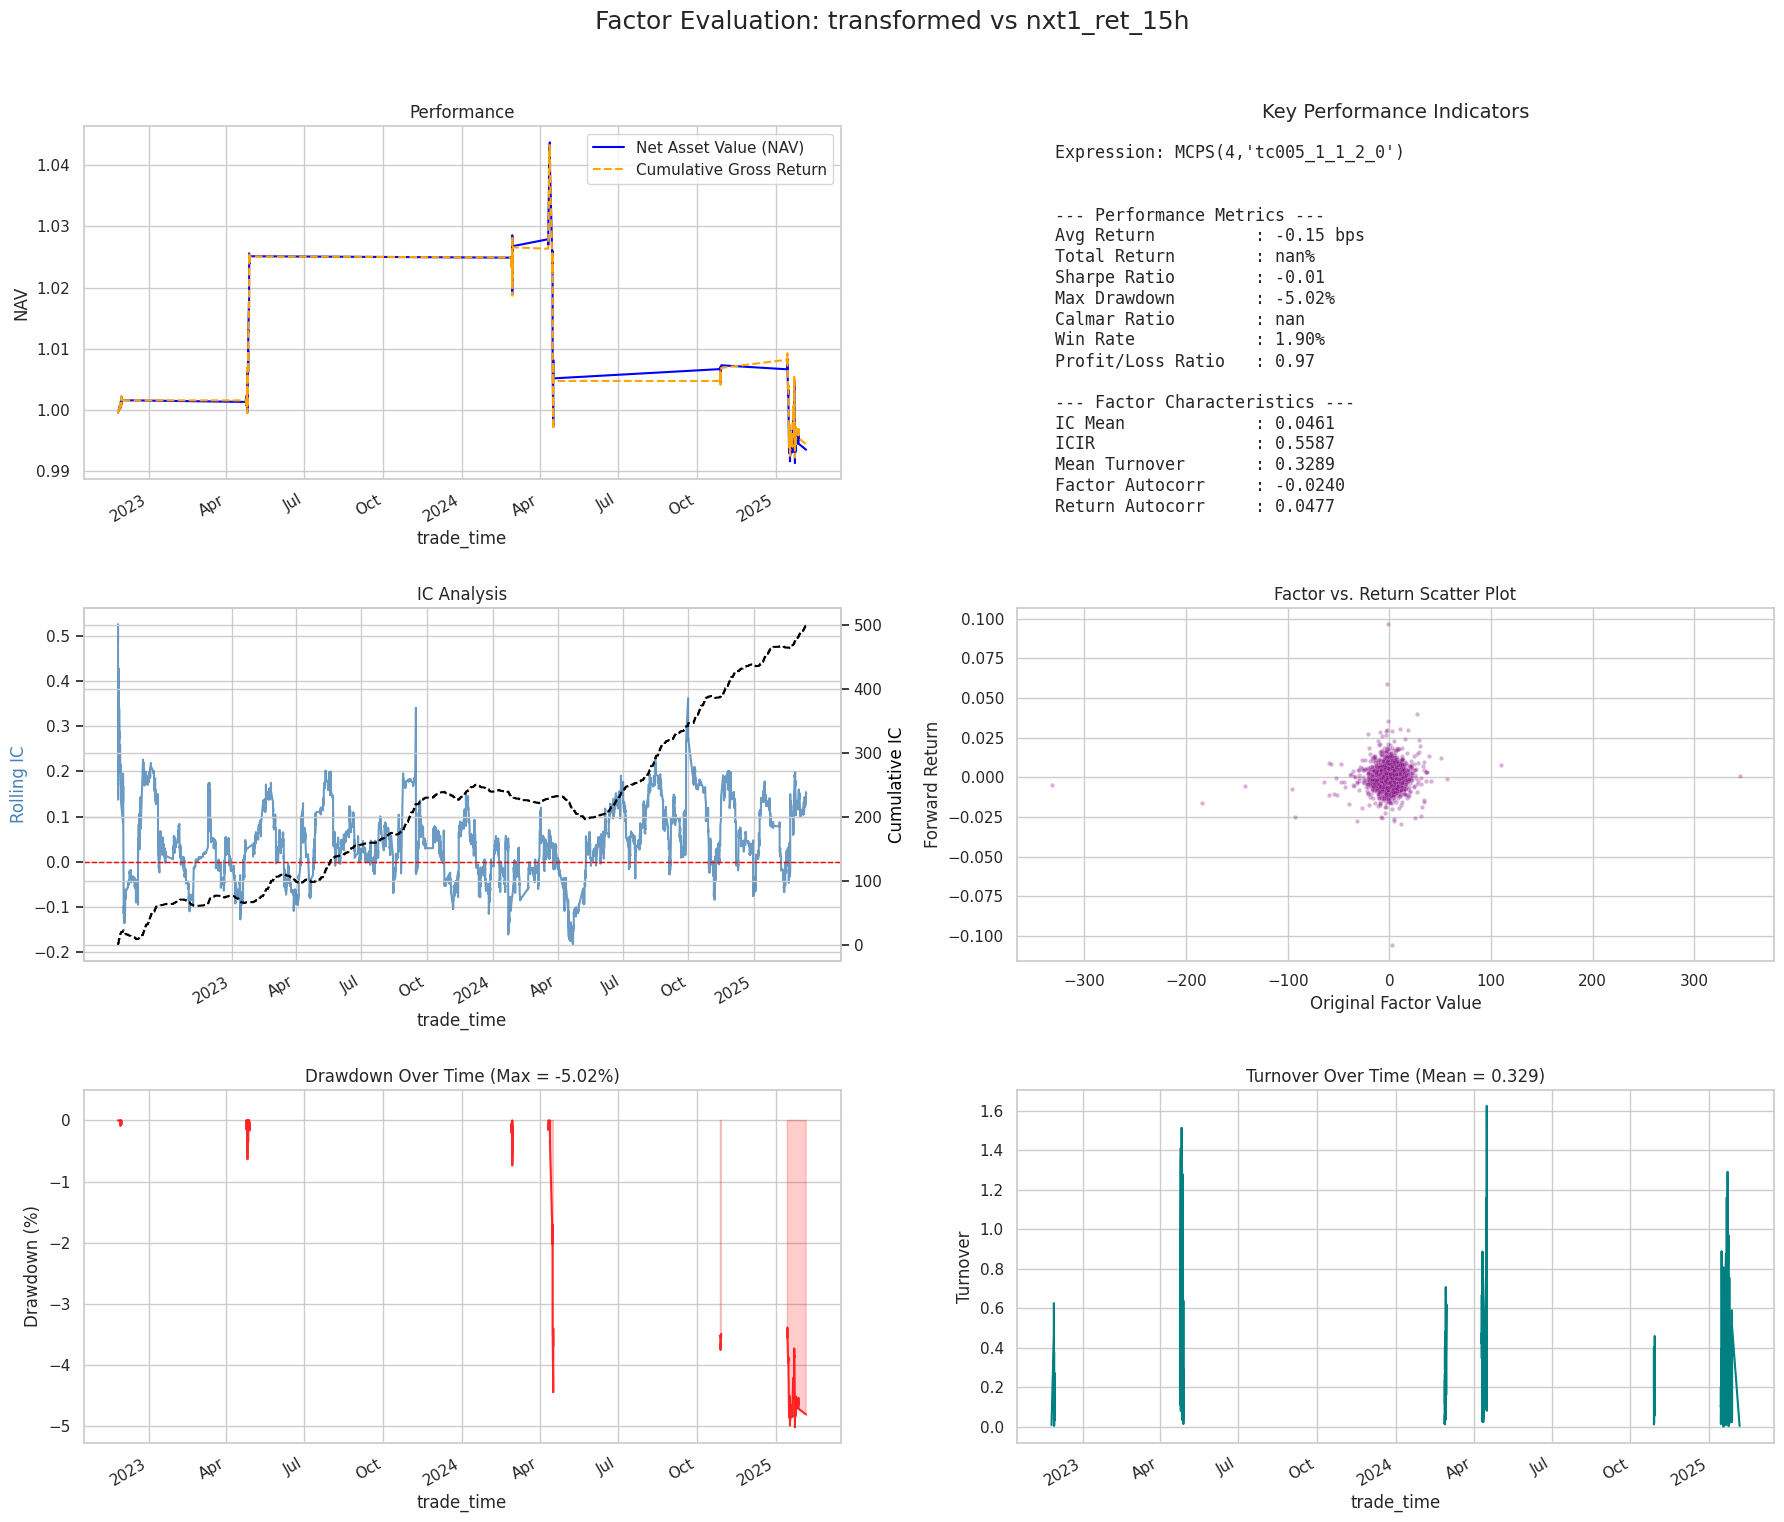

In [20]:
evaluate1.plot_results()

In [18]:
#evaluate1.factor_data['net_ret'].loc['2024-10-25':].cumsum()#.plot(figsize=(14,7))

#2024-10-08-2024-10-28

In [32]:
ftd = dt1.copy()
ftd = ftd.set_index('trade_time')

In [34]:
ftd.loc['2024-10-08':'2024-10-25']

,transformed,code,nxt1_ret_15h
trade_time,,,
2024-10-08 09:30:00,-0.462117,IM,-0.004810
2024-10-08 09:45:00,0.298318,IM,0.004726
2024-10-08 10:00:00,-0.040015,IM,-0.016328
2024-10-08 10:15:00,0.395602,IM,-0.011612
2024-10-08 10:30:00,0.214752,IM,-0.002330
...,...,...,...
2024-10-25 14:00:00,-0.064166,IM,-0.004137
2024-10-25 14:15:00,0.029613,IM,-0.001443
2024-10-25 14:30:00,-0.298224,IM,0.002400


In [37]:
ftd['transformed'].dropna().rolling(240).mean().loc['2024-10-08':'2024-10-25']

trade_time
2024-10-08 09:30:00   -0.009044
2024-10-08 09:45:00   -0.008182
2024-10-08 10:00:00   -0.008647
2024-10-08 10:15:00   -0.006133
2024-10-08 10:30:00   -0.006899
                         ...   
2024-10-25 14:00:00   -0.015839
2024-10-25 14:15:00   -0.017138
2024-10-25 14:30:00   -0.018277
2024-10-25 14:45:00   -0.018719
2024-10-25 15:00:00   -0.018441
Name: transformed, Length: 238, dtype: float64

In [38]:
ftd['transformed'].rolling(240).mean().loc['2024-10-08':'2024-10-25']

trade_time
2024-10-08 09:30:00   NaN
2024-10-08 09:45:00   NaN
2024-10-08 10:00:00   NaN
2024-10-08 10:15:00   NaN
2024-10-08 10:30:00   NaN
                       ..
2024-10-25 14:00:00   NaN
2024-10-25 14:15:00   NaN
2024-10-25 14:30:00   NaN
2024-10-25 14:45:00   NaN
2024-10-25 15:00:00   NaN
Name: transformed, Length: 238, dtype: float64

In [39]:
ftd['transformed'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10862 entries, 2022-07-25 09:45:00 to 2025-03-14 15:00:00
Series name: transformed
Non-Null Count  Dtype  
--------------  -----  
10860 non-null  float64
dtypes: float64(1)
memory usage: 427.8 KB


In [45]:
ftd[ftd['transformed'].isnull()]

,transformed,code,nxt1_ret_15h
trade_time,,,
2024-09-30 14:15:00,NaN,IM,-0.000476
2024-09-30 15:00:00,NaN,IM,-0.003587


In [46]:
ftd

,transformed,code,nxt1_ret_15h
trade_time,,,
2022-07-25 09:45:00,-0.228989,IM,-0.006898
2022-07-25 10:00:00,-0.122615,IM,0.000903
2022-07-25 10:15:00,-0.140732,IM,0.001209
2022-07-25 10:30:00,-0.329733,IM,-0.001141
2022-07-25 10:45:00,0.267779,IM,0.001067
...,...,...,...
2025-03-14 14:00:00,-0.306777,IM,-0.001843
2025-03-14 14:15:00,-0.212549,IM,0.000721
2025-03-14 14:30:00,0.303574,IM,-0.000641
